In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_style("dark")

In [ ]:
class Columns:

    TRANSACTION = "Transaction"
    CUSTOMER_TYPE = "Customer_Type"
    SYSTEM_F1 = "SystemF1"
    SYSTEM_F2 = "SystemF2"
    SYSTEM_F3 = "SystemF3"
    SYSTEM_F4 = "SystemF4"
    SYSTEM_F5 = "SystemF5"
    ACCOUNT_PAGE = "Account_Page"
    ACCOUNT_PAGE_TIME = "Account_Page_Time"
    INFO_PAGE = "Info_Page"
    INFO_PAGE_TIME = "Info_Page_Time"
    PRODUCT_PAGE = "ProductPage"
    PRODUCT_PAGE_TIME = "ProductPage_Time"
    MONTH = "Month"
    WEEKDAY = "Weekday"
    SPECIFIC_HOLIDAY = "SpecificHoliday"
    GOOGLE_ANALYTICS_BR = "GoogleAnalytics_BR"
    GOOGLE_ANALYTICS_ER = "GoogleAnalytics_ER"
    GOOGLE_ANALYTICS_PV = "GoogleAnalytics_PV"
    AD_CAMPAIGN_1 = "Ad_Campaign_1"
    AD_CAMPAIGN_2 = "Ad_Campaign2"
    AD_CAMPAIGN_3 = "Ad_Campaign3"

In [ ]:
dtype = {
        Columns.TRANSACTION: np.int8,
        Columns.CUSTOMER_TYPE: "category",
        Columns.SYSTEM_F1: np.int8,
        Columns.SYSTEM_F2: np.int8,
        Columns.SYSTEM_F3: np.int8,
        Columns.SYSTEM_F4: np.int8,
        Columns.SYSTEM_F5: np.int8,
        Columns.ACCOUNT_PAGE: np.int8,
        Columns.ACCOUNT_PAGE_TIME: np.float64,
        Columns.INFO_PAGE: np.int8,
        Columns.INFO_PAGE_TIME: np.float64,
        Columns.PRODUCT_PAGE: np.int16,
        Columns.PRODUCT_PAGE_TIME: np.float64,
        Columns.MONTH: np.int8,
        Columns.WEEKDAY: "bool",
        Columns.SPECIFIC_HOLIDAY: "category",
        Columns.GOOGLE_ANALYTICS_BR: np.float64,
        Columns.GOOGLE_ANALYTICS_ER: np.float64,
        Columns.GOOGLE_ANALYTICS_PV: np.float64,
        Columns.AD_CAMPAIGN_1: np.int8,
        Columns.AD_CAMPAIGN_2: np.int8,
        Columns.AD_CAMPAIGN_3: np.int8,
    }

In [ ]:
csv_file = "https://raw.githubusercontent.com/Mlad-en/ML_Challenge/main/Newdata-2.csv"
df = pd.read_csv(csv_file, dtype=dtype)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Transaction         12205 non-null  int8    
 1   Customer_Type       12205 non-null  category
 2   SystemF1            12205 non-null  int8    
 3   SystemF2            12205 non-null  int8    
 4   SystemF3            12205 non-null  int8    
 5   SystemF4            12205 non-null  int8    
 6   SystemF5            12205 non-null  int8    
 7   Account_Page        12205 non-null  int8    
 8   Account_Page_Time   12205 non-null  float64 
 9   Info_Page           12205 non-null  int8    
 10  Info_Page_Time      12205 non-null  float64 
 11  ProductPage         12205 non-null  int16   
 12  ProductPage_Time    12205 non-null  float64 
 13  Month               12205 non-null  int8    
 14  Weekday             12205 non-null  bool    
 15  SpecificHoliday     12205 non-null  

## Missing Values

There are no explicitly missing values in the dataset.



In [ ]:
df.isnull().sum()

Transaction           0
Customer_Type         0
SystemF1              0
SystemF2              0
SystemF3              0
SystemF4              0
SystemF5              0
Account_Page          0
Account_Page_Time     0
Info_Page             0
Info_Page_Time        0
ProductPage           0
ProductPage_Time      0
Month                 0
Weekday               0
SpecificHoliday       0
GoogleAnalytics_BR    0
GoogleAnalytics_ER    0
GoogleAnalytics_PV    0
Ad_Campaign_1         0
Ad_Campaign2          0
Ad_Campaign3          0
dtype: int64

### Class Variable - Transactions

The variable is an `imbalanced binary` one.

In [ ]:
df.Transaction.value_counts()

0    10297
1     1908
Name: Transaction, dtype: int64

In [ ]:
df.Transaction.value_counts() / len(df)

0    0.843671
1    0.156329
Name: Transaction, dtype: float64

### Predictor Variables


#### Customer Type

This is an `imbalanced categorical` variable with three levels:
* Returning_Customer
* New_Customer
* Other

In [ ]:
print("="*100)
print(df[Columns.CUSTOMER_TYPE].unique())
print("="*100)
print(df[[Columns.CUSTOMER_TYPE]].value_counts())
print("="*100)

['Returning_Customer', 'New_Customer', 'Other']
Categories (3, object): ['New_Customer', 'Other', 'Returning_Customer']
Customer_Type     
Returning_Customer    10431
New_Customer           1693
Other                    81
dtype: int64


In [ ]:
print("="*100)
print(pd.crosstab(df[Columns.TRANSACTION], df[Columns.CUSTOMER_TYPE], margins=True))
print("="*100)
print(pd.crosstab(df[Columns.TRANSACTION], df[Columns.CUSTOMER_TYPE], normalize=True))
print("="*100)

Customer_Type  New_Customer  Other  Returning_Customer    All
Transaction                                                  
0                      1271     65                8961  10297
1                       422     16                1470   1908
All                    1693     81               10431  12205
Customer_Type  New_Customer     Other  Returning_Customer
Transaction                                              
0                  0.104138  0.005326            0.734207
1                  0.034576  0.001311            0.120442


#### Systems F1-F5 variables

The variables in this cluster are discrete numeric ones but are scaled differently.

System_F1 - System_F4 are positively skewed, whereas System_F5 is more or less symmentrical.

* SystemF1 - skew: 2.032613 (extreme); scale = 1-8;  Contains Outliers = Yes
* SystemF2 - skew: 3.217404 (extreme); scale = 1-13; Contains Outliers = Yes
* SystemF3 - skew: 0.978480 (some);    scale = 1-9;  Contains Outliers = Yes
* SystemF4 - skew: 1.958514 (extreme); scale = 1-20; Contains Outliers = Yes
* SystemF5 - skew: 0.002078 (symmetrical); scale = 1-5; Contains Outliers = No

In [ ]:
system_variables = [
    Columns.SYSTEM_F1,
    Columns.SYSTEM_F2,
    Columns.SYSTEM_F3,
    Columns.SYSTEM_F4,
    Columns.SYSTEM_F5,
]

In [ ]:
df[system_variables].describe()

,SystemF1,SystemF2,SystemF3,SystemF4,SystemF5
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.124211,2.357804,3.153298,4.073904,3.003687
std,0.906823,1.710114,2.402340,4.016654,1.409130
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,2.000000,2.000000
50%,2.000000,2.000000,3.000000,2.000000,3.000000
75%,3.000000,2.000000,4.000000,4.000000,4.000000
max,8.000000,13.000000,9.000000,20.000000,5.000000


In [ ]:
df[system_variables].skew()

SystemF1    2.032613
SystemF2    3.217404
SystemF3    0.978480
SystemF4    1.958514
SystemF5    0.002078
dtype: float64

<Axes: xlabel='system', ylabel='score'>

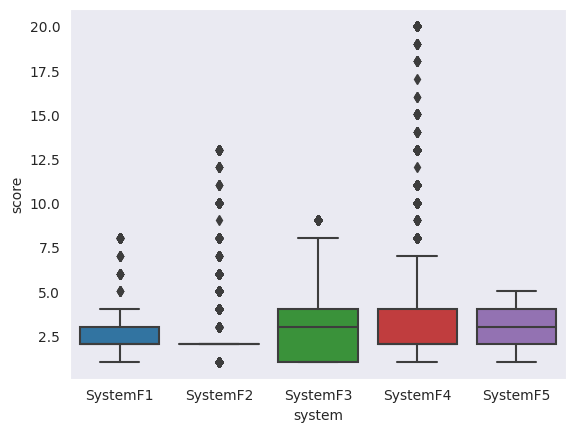

In [ ]:
sns.boxplot(data=df[system_variables].melt(var_name="system", value_name="score"), x="system", y="score")

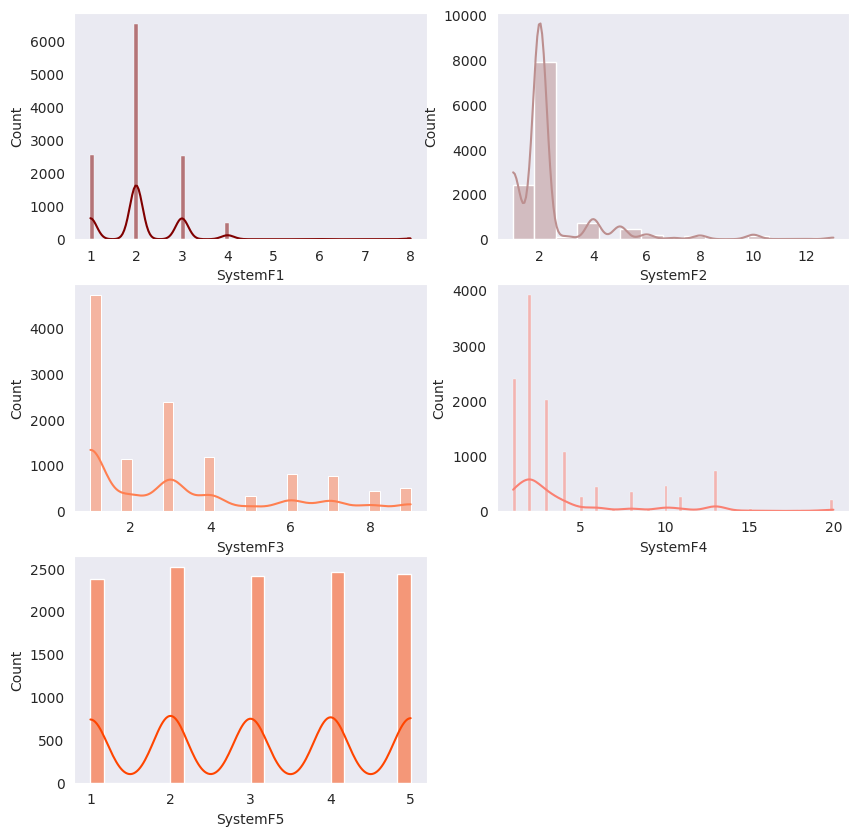

In [ ]:
axis_indices = [(row, col) for row in range(0, 3) for col in range(0, 2)]
color_indices = ["maroon", "rosybrown", "coral", "salmon", "orangered"]

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.delaxes(axs.flatten()[-1])

for index in range(0, len(axis_indices)-1):
  sns.histplot(data=df, x=system_variables[index], kde=True, color=color_indices[index], ax=axs[axis_indices[index]])

plt.show()

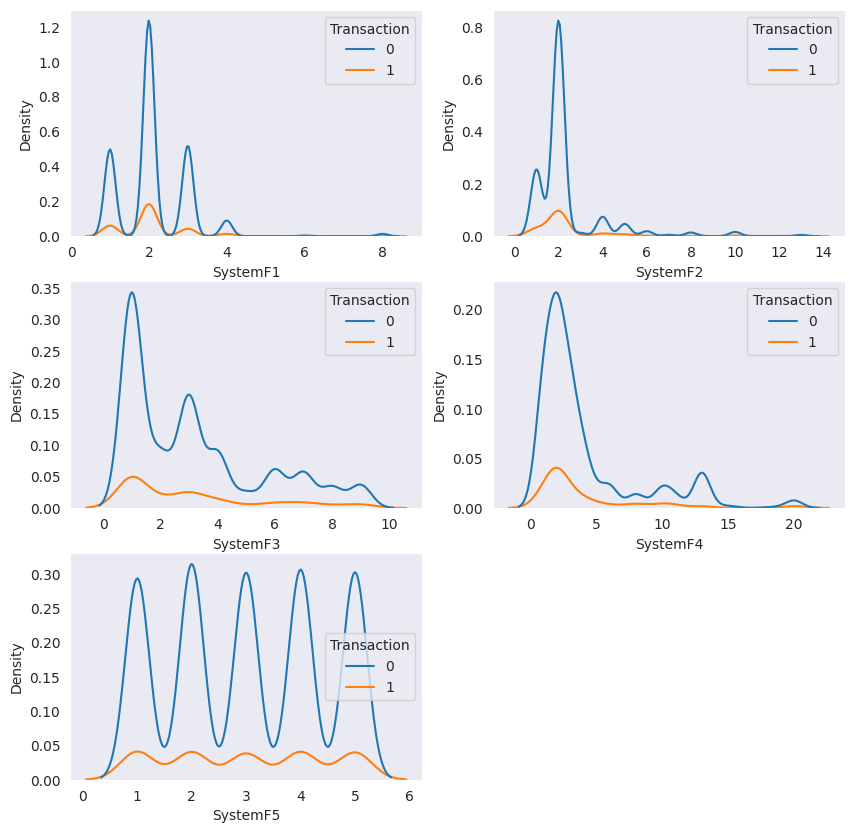

In [ ]:
axis_indices = [(row, col) for row in range(0, 3) for col in range(0, 2)]

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.delaxes(axs.flatten()[-1])

for index in range(0, len(axis_indices)-1):
  sns.kdeplot(data=df, x=system_variables[index], hue=df[Columns.TRANSACTION], ax=axs[axis_indices[index]])

plt.show()

#### Pages

In [ ]:
pages = [
    Columns.ACCOUNT_PAGE,
    Columns.INFO_PAGE,
    Columns.PRODUCT_PAGE
]

page_times = [
    Columns.ACCOUNT_PAGE_TIME,
    Columns.INFO_PAGE_TIME,
    Columns.PRODUCT_PAGE_TIME
]

In [ ]:
df[pages].describe()

,Account_Page,Info_Page,ProductPage
count,12205.000000,12205.000000,12205.000000
mean,2.338878,0.508726,32.045637
std,3.330436,1.275617,44.593649
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,8.000000
50%,1.000000,0.000000,18.000000
75%,4.000000,0.000000,38.000000
max,27.000000,24.000000,705.000000


In [ ]:
df[pages].skew()

Account_Page    1.947123
Info_Page       4.014173
ProductPage     4.333419
dtype: float64

In [ ]:
df[page_times].describe()

,Account_Page_Time,Info_Page_Time,ProductPage_Time
count,12205.000000,12205.000000,12205.000000
mean,81.646331,34.825454,1206.982457
std,177.491845,141.424807,1919.601400
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,193.000000
50%,9.000000,0.000000,608.942857
75%,94.700000,0.000000,1477.154762
max,3398.750000,2549.375000,63973.522230


In [ ]:
df[page_times].skew()

Account_Page_Time    5.592152
Info_Page_Time       7.540291
ProductPage_Time     7.253161
dtype: float64

<Axes: xlabel='system', ylabel='score'>

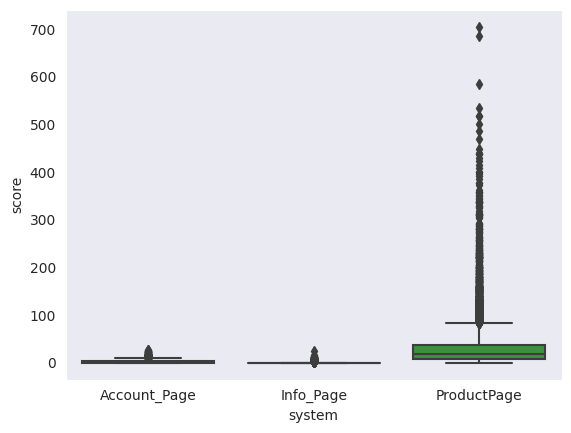

In [ ]:
sns.boxplot(data=df[pages].melt(var_name="system", value_name="score"), x="system", y="score")

<Axes: xlabel='system', ylabel='score'>

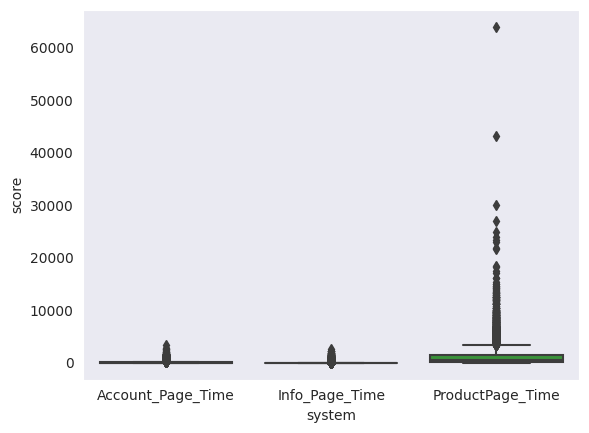

In [ ]:
sns.boxplot(data=df[page_times].melt(var_name="system", value_name="score"), x="system", y="score")

#### Days

In [ ]:
days = [
    Columns.MONTH,
    Columns.SPECIFIC_HOLIDAY,
    Columns.WEEKDAY
]

df[days].describe()

,Month
count,12205.000000
mean,7.394674
std,3.622622
min,2.000000
25%,4.000000
50%,8.000000
75%,11.000000
max,12.000000


In [ ]:
print("="*100)
print(pd.crosstab(df[Columns.TRANSACTION], df[Columns.MONTH], margins=True))
print("="*100)
print(pd.crosstab(df[Columns.TRANSACTION], df[Columns.MONTH], normalize=True).round(2))
print("="*100)


Month          2     3     4    6    7    8    9   10    11    12    All
Transaction                                                             
0            178  1668  2964  256  366  357  362  434  2222  1490  10297
1              3   192   365   29   66   76   86  115   760   216   1908
All          181  1860  3329  285  432  433  448  549  2982  1706  12205
Month          2     3     4     6     7     8     9     10    11    12
Transaction                                                            
0            0.01  0.14  0.24  0.02  0.03  0.03  0.03  0.04  0.18  0.12
1            0.00  0.02  0.03  0.00  0.01  0.01  0.01  0.01  0.06  0.02


In [ ]:
df[days].skew()

<ipython-input-23-ac9e78e55c52>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[days].skew()


Month      0.001248
Weekday   -1.255097
dtype: float64

In [ ]:
df[Columns.WEEKDAY].value_counts()

True     9346
False    2859
Name: Weekday, dtype: int64

<Axes: xlabel='Month', ylabel='Count'>

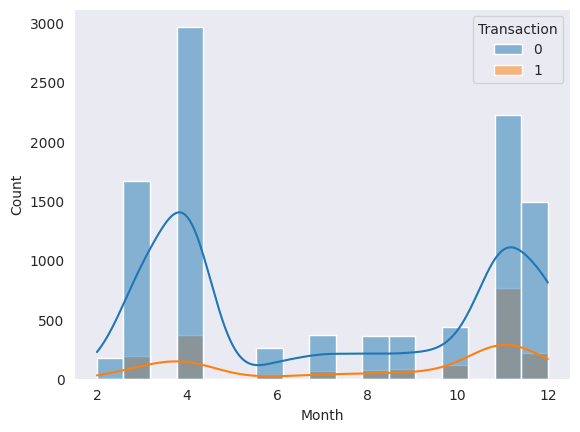

In [ ]:
sns.histplot(data=df, x=df[Columns.MONTH], hue=df[Columns.TRANSACTION], kde=True)

<Axes: xlabel='SpecificHoliday', ylabel='Count'>

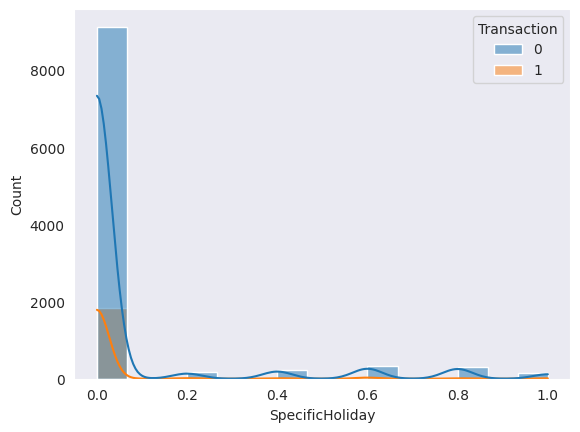

In [ ]:
sns.histplot(data=df, x=df[Columns.SPECIFIC_HOLIDAY].astype(np.float64), hue=df[Columns.TRANSACTION], kde=True)

<Axes: xlabel='SpecificHoliday', ylabel='Count'>

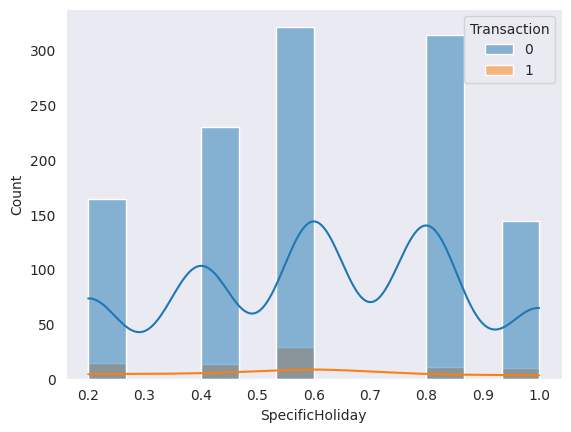

In [ ]:
sns.histplot(
    data=df, 
    x=df[df[Columns.SPECIFIC_HOLIDAY].astype(np.float64) > 0][Columns.SPECIFIC_HOLIDAY].astype(np.float64), 
    hue=df[Columns.TRANSACTION],
    kde=True
    )


In [ ]:
print("="*100)
print(pd.crosstab(df[Columns.TRANSACTION], df[Columns.SPECIFIC_HOLIDAY].astype('category'), margins=True))
print("="*100)
print(pd.crosstab(df[Columns.TRANSACTION], df[Columns.SPECIFIC_HOLIDAY].astype('category'), normalize=True).round(3))
print("="*100)

SpecificHoliday      0  0.2  0.4  0.6  0.8    1    All
Transaction                                           
0                 9125  164  230  321  313  144  10297
1                 1831   14   13   29   11   10   1908
All              10956  178  243  350  324  154  12205
SpecificHoliday      0    0.2    0.4    0.6    0.8      1
Transaction                                              
0                0.748  0.013  0.019  0.026  0.026  0.012
1                0.150  0.001  0.001  0.002  0.001  0.001


#### Google Analytics and Google Ad Campaigns

In [ ]:
ad_campaigns = [
    Columns.AD_CAMPAIGN_1,
    Columns.AD_CAMPAIGN_2,
    Columns.AD_CAMPAIGN_3,
]

google_analytics = [
    Columns.GOOGLE_ANALYTICS_BR,
    Columns.GOOGLE_ANALYTICS_ER,
    Columns.GOOGLE_ANALYTICS_PV
]

,GoogleAnalytics_BR,GoogleAnalytics_ER,GoogleAnalytics_PV
count,12205.000000,12205.000000,12205.000000
mean,0.020370,0.041466,5.949574
std,0.045255,0.046163,18.653671
min,0.000000,0.000000,0.000000
25%,0.000000,0.014231,0.000000
50%,0.002899,0.025000,0.000000
75%,0.016667,0.048529,0.000000
max,0.200000,0.200000,361.763742


In [ ]:
df[ad_campaigns].describe()

,Ad_Campaign_1,Ad_Campaign2,Ad_Campaign3
count,12205.000000,12205.000000,12205.000000
mean,0.016796,0.016796,0.016796
std,0.128513,0.128513,0.128513
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [ ]:
df[ad_campaigns].value_counts()

Ad_Campaign_1  Ad_Campaign2  Ad_Campaign3
0              0             0               11590
                             1                 205
               1             0                 205
1              0             0                 205
dtype: int64

In [ ]:
print("="*100)
print(pd.crosstab(df[Columns.AD_CAMPAIGN_1], df[Columns.TRANSACTION], margins=True))
print("="*100)

print("="*100)
print(pd.crosstab(df[Columns.AD_CAMPAIGN_2], df[Columns.TRANSACTION], margins=True))
print("="*100)


print("="*100)
print(pd.crosstab(df[Columns.AD_CAMPAIGN_3], df[Columns.TRANSACTION], margins=True))
print("="*100)

Transaction        0     1    All
Ad_Campaign_1                    
0              10101  1899  12000
1                196     9    205
All            10297  1908  12205
Transaction       0     1    All
Ad_Campaign2                    
0             10123  1877  12000
1               174    31    205
All           10297  1908  12205
Transaction       0     1    All
Ad_Campaign3                    
0             10128  1872  12000
1               169    36    205
All           10297  1908  12205


In [ ]:
df[google_analytics].describe()

,GoogleAnalytics_BR,GoogleAnalytics_ER,GoogleAnalytics_PV
count,12205.000000,12205.000000,12205.000000
mean,0.020370,0.041466,5.949574
std,0.045255,0.046163,18.653671
min,0.000000,0.000000,0.000000
25%,0.000000,0.014231,0.000000
50%,0.002899,0.025000,0.000000
75%,0.016667,0.048529,0.000000
max,0.200000,0.200000,361.763742


In [ ]:
df[google_analytics].skew()

GoogleAnalytics_BR    3.162425
GoogleAnalytics_ER    2.234645
GoogleAnalytics_PV    6.350983
dtype: float64

<Axes: xlabel='analytics', ylabel='score'>

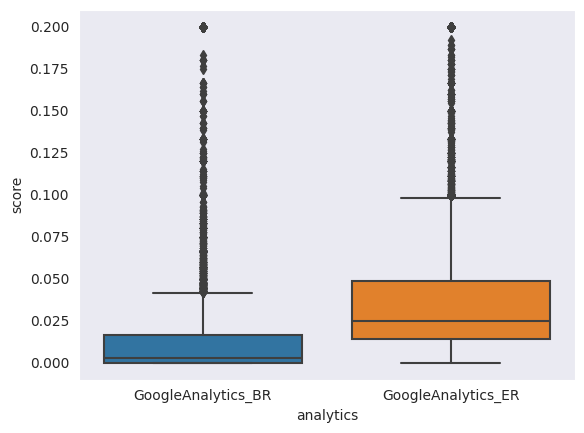

In [ ]:
sns.boxplot(data=df[google_analytics[0:2]].melt(var_name="analytics", value_name="score"), x="analytics", y="score")

<Axes: >

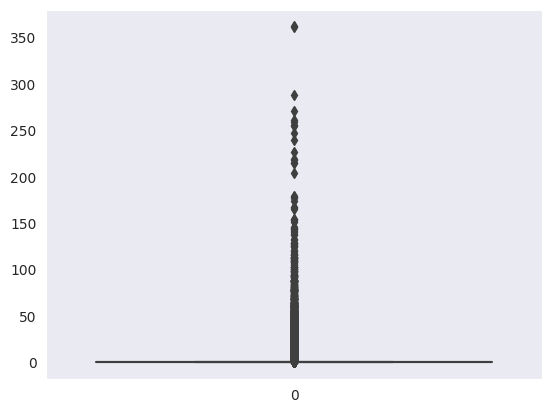

In [ ]:
sns.boxplot(data=df[Columns.GOOGLE_ANALYTICS_PV])

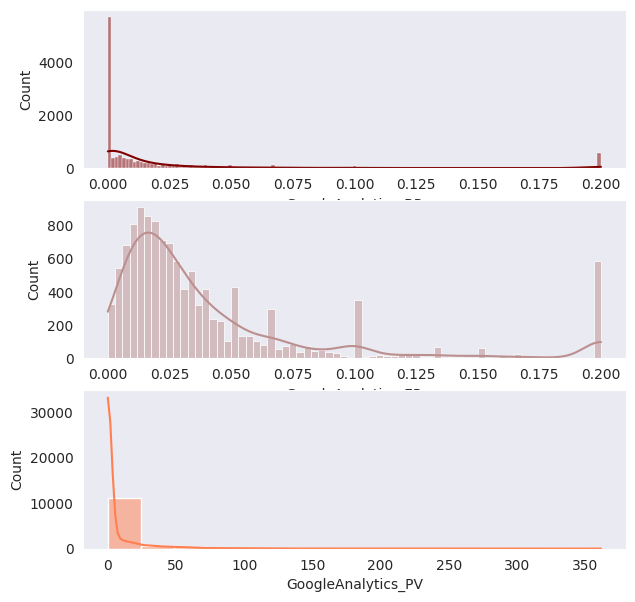

In [ ]:
fig, axs = plt.subplots(3, figsize=(7, 7))

for index in range(0, 3):
  sns.histplot(data=df, x=google_analytics[index], kde=True, color=color_indices[index], ax=axs[index])

plt.show()

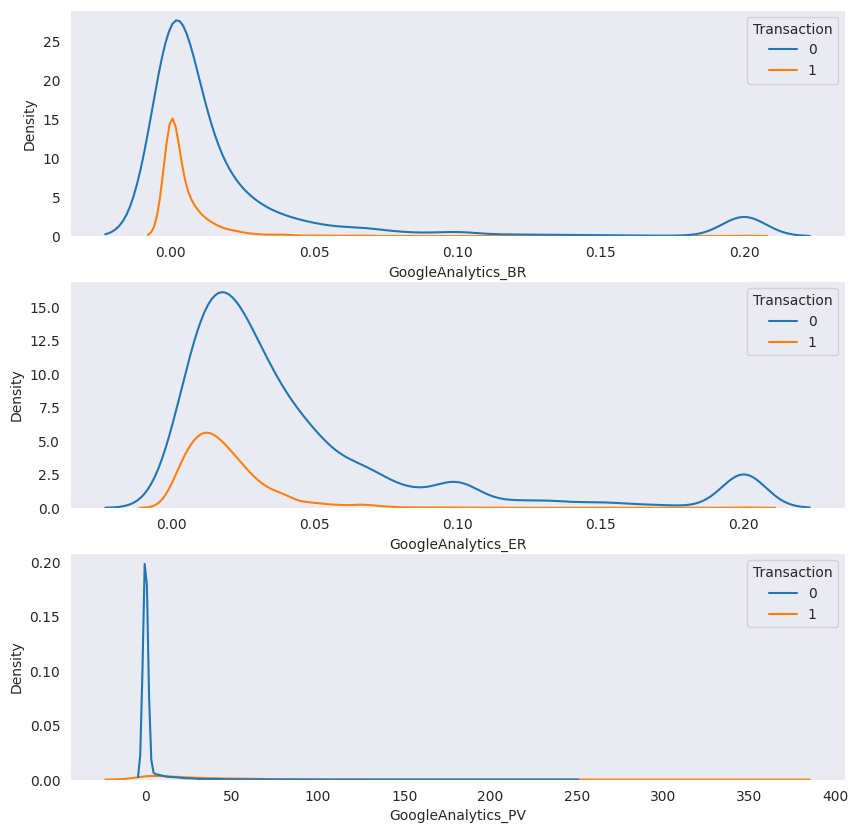

In [ ]:
fig, axs = plt.subplots(3, figsize=(10, 10))

for index in range(0, 3):
  sns.kdeplot(data=df, x=google_analytics[index], hue=df[Columns.TRANSACTION], ax=axs[index])

plt.show()

<ipython-input-6-ed6049c323bd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson').round(3), annot=True)


<Axes: >

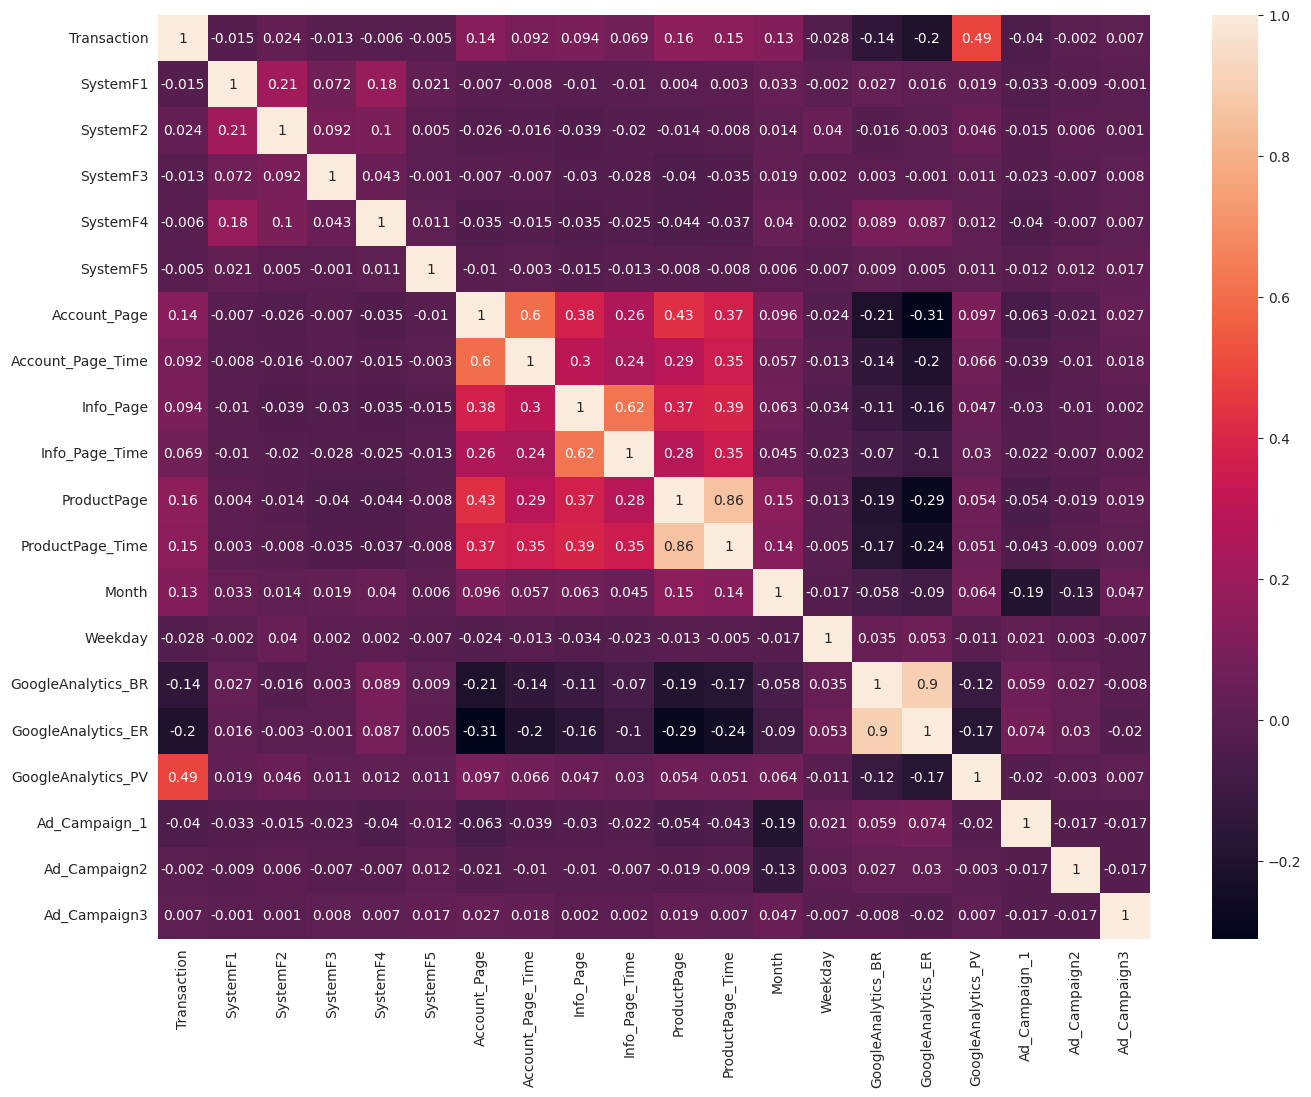

In [ ]:
plt.figure(figsize=(16, 12))

sns.heatmap(df.corr(method='pearson').round(3), annot=True)